 # MOVIE RECOMMENDER SYSTEM



# Certification Project

Domain –OTT Platform

Overview


Context

Over the past two decades, there has been a monumental shift in how people access and
consume video content. With the universal access to broadband internet, numerous platforms
like YouTube, Netflix, and HBO Go emerged and steadily grew to prominence.
Although not a household name in itself, OTT is the exact technology that made the streaming
revolution possible.

OTT stands for “Over The Top” which refers to any video streaming service delivering content
to the users over the internet, however, there are subscription charges associated with the
usage of such platforms such as PrimeVideo, Netflix, HotStart, Zee5, SonyLiv, etc.
But choosing your next movie to watch can still be a daunting task, even if you have access to
all the platforms.

Business Requirement:
    
“MyNextMovie” is a budding startup in the space of recommendations on top of various OTT
platforms providing suggestions to its customer base regarding their next movie.
Their major business is to create a recommendation layer on top of these OTT platforms so
that they can make suitable recommendations to their customers, however, since they are in
research mode right now, they would want to experiment with open-source data first to
understand the depth of the models which can be delivered by them.

The data for this exercise is open-source data that has been collected and made available from
the MovieLens website (http://movielens.org), a part of GroupLens
Research The data sets were collected over various periods of time, depending on the size of
the set.

You have recently joined as a Data Scientist at “MyNextMovie” and plan to help the existing
team to set up a recommendation platform.

https://www.kaggle.com/code/ayushimishra2809/movie-recommendation-system/data
?select=ratings.csv

### Data Description


The data consists of 105339 ratings applied over 10329 movies. The average rating and
minimum and maximum rating are 0.5 and 5 respectively. There are 668 users who have given
their ratings for 149532 movies.

There are two data files which are provided:
    
Movies.csv

● movieId: ID assigned to a movie
    
● title: Title of a movie
    
● genres: pipe-separated list of movie genres.
    
Ratings.csv

● userId: ID assigned to a user
    
● movieId: ID assigned to a movie
    
● rating: rating by a user to a movie
    
● Timestamp: time at which the rating was provided.

In [1]:
import re
import numpy as np
import scipy.stats
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [4]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title) 

In [5]:
genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

In [6]:
movie_title

'[\'Toy Story\', \'Jumanji\', \'Grumpier Old Men\', \'Waiting to Exhale\', \'Father of the Bride Part II\', \'Heat\', \'Sabrina\', \'Tom and Huck\', \'Sudden Death\', \'GoldenEye\', \'American President, The\', \'Dracula: Dead and Loving It\', \'Balto\', \'Nixon\', \'Cutthroat Island\', \'Casino\', \'Sense and Sensibility\', \'Four Rooms\', \'Ace Ventura: When Nature Calls\', \'Money Train\', \'Get Shorty\', \'Copycat\', \'Assassins\', \'Powder\', \'Leaving Las Vegas\', \'Othello\', \'Now and Then\', \'Persuasion\', \'City of Lost Children, The (Cité des enfants perdus, La)\', \'Shanghai Triad (Yao a yao yao dao waipo qiao)\', \'Dangerous Minds\', \'Twelve Monkeys (a.k.a. 12 Monkeys)\', \'Wings of Courage\', \'Babe\', \'Carrington\', \'Dead Man Walking\', \'Clueless\', \'Cry, the Beloved Country\', \'Richard III\', \'Dead Presidents\', \'Restoration\', \'Mortal Kombat\', \'To Die For\', \'How to Make an American Quilt\', \'Seven (a.k.a. Se7en)\', \'Pocahontas\', \'When Night Is Falling

Data Visualization

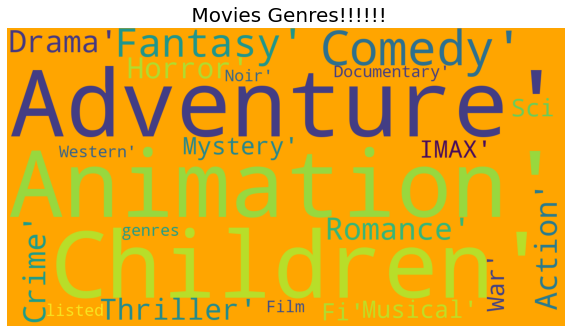

In [7]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='orange',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='red',min_font_size=2
                    ,min_word_length=3).generate(movie_title)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title(' Movies Genres!!!!!!',fontsize=20)
plt.imshow(wordcloud_genre)

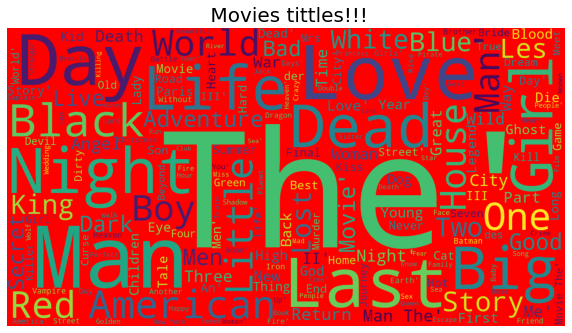

In [8]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title(' Movies tittles!!!',fontsize=20)
plt.imshow(wordcloud_title)

In [9]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


In [10]:
data1=df[['title','genres','rating']]
data1


,title,genres,rating
0,Casino (1995),Crime|Drama,4.0
1,Powder (1995),Drama|Sci-Fi,1.5
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,4.0
3,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.0
4,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.0
...,...,...,...
105334,Spotlight (2015),Thriller,4.0
105335,Pawn Sacrifice (2015),Drama,3.5
105336,Bridge of Spies (2015),Drama|Thriller,4.0
105337,Bone Tomahawk (2015),Horror|Western,2.5


In [11]:
final=data1.groupby(['title','genres']).agg({'rating':['mean','count']})
final.columns=['Average movie Rating','Num Reviews']
final=final.reset_index()
final

,title,genres,Average movie Rating,Num Reviews
0,'71 (2014),Action|Drama|Thriller|War,3.500000,1
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,3.000000,1
2,'Round Midnight (1986),Drama|Musical,2.500000,1
3,'Til There Was You (1997),Drama|Romance,4.000000,3
4,"'burbs, The (1989)",Comedy,3.125000,20
...,...,...,...,...
10320,loudQUIETloud: A Film About the Pixies (2006),Documentary,4.500000,1
10321,xXx (2002),Action|Crime|Thriller,2.958333,24
10322,xXx: State of the Union (2005),Action|Crime|Thriller,2.071429,7
10323,¡Three Amigos! (1986),Comedy|Western,3.012500,40


In [12]:
final.sort_values("Num Reviews",ascending=False)
final=final.sort_values("Average movie Rating",ascending=False)
final


,title,genres,Average movie Rating,Num Reviews
952,Being Human (1993),Drama,5.0,1
5567,Love Exposure (Ai No Mukidashi) (2008),Action|Comedy|Drama|Romance,5.0,1
2393,Dear Diary (Caro Diario) (1994),Comedy|Drama,5.0,1
10094,Wings (1927),Action|Drama|Romance|War,5.0,2
8813,Svengali (1931),Drama|Horror,5.0,1
...,...,...,...,...
7423,Raising Cain (1992),Horror|Thriller,0.5,1
3475,Full Body Massage (1995),Drama,0.5,1
4149,High School Musical (2006),Children|Comedy|Drama|Musical|Romance,0.5,2
4150,High School Musical 2 (2007),Comedy|Drama|Musical|Romance,0.5,1


### CASE 1

1. Create a popularity-based recommender system at a genre level. The user will input a genre (g), minimum rating threshold (t) for a movie, and no. of
recommendations(N) for which it should be recommended top N movies which are
most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.

Example:

Input:

• Genre (g) : Comedy

• Minimum reviews threshold (t): 100

• Num recommendations (N) : 5


In [13]:
#taking input from user
g=input("Genre(g):").strip()
t=int(input("Minimum reviews threshold(t):"))
N=int(input("Number of recommendations:"))

Genre(g):Horror
Minimum reviews threshold(t):100
Number of recommendations:5


In [14]:
final=final[final['genres'].str.contains(g,case=False)]
final

,title,genres,Average movie Rating,Num Reviews
8813,Svengali (1931),Drama|Horror,5.0,1
9007,"Tetsuo, the Ironman (Tetsuo) (1988)",Action|Horror|Sci-Fi|Thriller,5.0,1
4408,"Hush... Hush, Sweet Charlotte (1964)",Horror|Thriller,5.0,1
6250,"Mummy's Hand, The (1940)",Horror,5.0,1
7566,Resident Evil: Retribution (2012),Action|Horror|Sci-Fi|IMAX,5.0,2
...,...,...,...,...
1921,"Clonus Horror, The (1979)",Horror|Sci-Fi,0.5,1
9885,We Are What We Are (Somos lo que hay) (2010),Drama|Horror,0.5,1
5318,Leprechaun 2 (1994),Comedy|Fantasy|Horror,0.5,1
5285,Leatherface: Texas Chainsaw Massacre III (1990),Comedy|Horror|Thriller,0.5,1


In [15]:
#taking only the dataset where the no of reviews is greater than the specified value by user 
final=pd.DataFrame(final[(final['Num Reviews']>t)])
m=final.drop('genres',axis=1)

In [16]:
#renaming the title to movie title
s=m.rename({'title':'Movie title'},axis=1)
s.reset_index()
s.insert(0,"SL.No",range(1,1+len(s)))

In [17]:
print("Result is :")
s[:N]

Result is :


,SL.No,Movie title,Average movie Rating,Num Reviews
8229,1,"Silence of the Lambs, The (1991)",4.194828,290
336,2,Aliens (1986),4.146497,157
8293,3,"Sixth Sense, The (1999)",4.130890,191
330,4,Alien (1979),4.064103,156
8167,5,"Shining, The (1980)",4.004464,112


### Case 2

2. Create a content-based recommender system that recommends top N movies based on
similar movie(m) genres.

Example:
    
Input:
    
• Movie Title (t): Toy Story
    
• Num recommendations (N): 5

In [18]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [19]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [20]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [21]:
p=input("Movie Name : ").strip()
N=int(input("Number of recommendation"))

Movie Name : Alien (1979)	
Number of recommendation6


In [22]:
#printing reccomendation of movies simillar to user input 
sim_mov=pd.DataFrame(recommendations(p)[:N])
sim_mov=sim_mov.rename({'title':'Movie title'},axis=1)
sim_mov.reset_index()
sim_mov.insert(0,"SL.No",range(1,1+len(sim_mov)))


In [23]:
print("Result is :")
sim_mov

Result is :


,SL.No,Movie title
292,1,Village of the Damned (1995)
456,2,"Puppet Masters, The (1994)"
975,3,Alien (1979)
1083,4,"Blob, The (1958)"
1351,5,Alien Escape (1995)
1445,6,Species II (1998)


### Case 3

3. Create a collaborative based recommender system which recommends top N movies
based on “K” similar users for a target user “u”

Example:
    
Input:
    
• UserID: 1
    
• Num recommendations(N): 5
    
• Threshold for similar users (k: 100

In [24]:
df1=df.pivot_table(index=['userId'],columns=['title'],values='rating')
df1

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [25]:
matrix_norm=df1.subtract(df1.mean(axis=1),axis='rows')
matrix_norm.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
user_simillarity=matrix_norm.T.corr()
user_simillarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.440012,0.504099,-0.094491,0.579821,0.190592,0.423659,0.354381,-1.000000,...,0.304921,0.375769,0.414539,0.359848,0.410803,-0.536212,0.038337,0.118424,0.147106,0.360385
2,-0.306186,1.000000,0.785714,-1.000000,NaN,NaN,-0.555556,0.256406,-0.110657,NaN,...,0.000000,NaN,0.604468,0.028677,0.408248,NaN,0.678401,-0.500000,-1.000000,0.480938
3,0.440012,0.785714,1.000000,-0.250000,0.162938,NaN,-0.201332,1.000000,0.167924,-0.188982,...,0.255742,0.252223,0.730769,0.020278,0.251040,-0.491398,0.484123,0.408248,0.064282,0.160345
4,0.504099,-1.000000,-0.250000,1.000000,-0.188982,NaN,-0.118798,-1.000000,0.500000,NaN,...,-0.052414,1.000000,-0.500000,0.238130,NaN,NaN,-0.883452,0.225981,0.693722,0.224482
5,-0.094491,NaN,0.162938,-0.188982,1.000000,-0.571548,0.120497,NaN,-0.158114,NaN,...,-0.444428,NaN,NaN,0.894125,NaN,-0.651900,-0.189340,-0.191492,-0.052658,-0.186282


In [27]:
#taking iput from user
picked_userid=int(input("Userid"))
N=int(input("Num recommendations"))
k=int(input("Threshold for simillar user"))

Userid5
Num recommendations5
Threshold for simillar user100


In [28]:
#dropping the picked user id
user_simillarity.drop(index=picked_userid,inplace=True)
user_simillarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.440012,0.504099,-0.094491,0.579821,0.190592,0.423659,0.354381,-1.000000,...,0.304921,0.375769,0.414539,0.359848,0.410803,-0.536212,0.038337,0.118424,0.147106,0.360385
2,-0.306186,1.000000,0.785714,-1.000000,NaN,NaN,-0.555556,0.256406,-0.110657,NaN,...,0.000000,NaN,0.604468,0.028677,0.408248,NaN,0.678401,-0.500000,-1.000000,0.480938
3,0.440012,0.785714,1.000000,-0.250000,0.162938,NaN,-0.201332,1.000000,0.167924,-0.188982,...,0.255742,0.252223,0.730769,0.020278,0.251040,-0.491398,0.484123,0.408248,0.064282,0.160345
4,0.504099,-1.000000,-0.250000,1.000000,-0.188982,NaN,-0.118798,-1.000000,0.500000,NaN,...,-0.052414,1.000000,-0.500000,0.238130,NaN,NaN,-0.883452,0.225981,0.693722,0.224482
6,0.579821,NaN,NaN,NaN,-0.571548,1.000000,0.300239,NaN,NaN,1.000000,...,0.285950,NaN,NaN,0.132453,NaN,NaN,0.194389,0.642575,1.000000,-0.003187


In [29]:
#setting a random positive threshold in range from -1 to 1
user_simillarity_threshold=0.3

In [30]:
#getting to k simmilar users
simillar_users=user_simillarity[user_simillarity[picked_userid]>user_simillarity_threshold][picked_userid].sort_values(ascending=False)[:k]


In [31]:
#simillar users for input user
print(f'the simillar users for{picked_userid} are',simillar_users)

the simillar users for5 are userId
274    1.000000
356    1.000000
375    1.000000
189    1.000000
204    1.000000
         ...   
384    0.500000
404    0.500000
81     0.500000
101    0.500000
326    0.497067
Name: 5, Length: 100, dtype: float64


In [32]:
#movies watched by target user
picked_userid_watched=matrix_norm[matrix_norm.index==picked_userid].dropna(axis=1,how='all')
picked_userid_watched

title,Ace Ventura: Pet Detective (1994),Airplane II: The Sequel (1982),Aladdin (1992),Austin Powers in Goldmember (2002),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Batman (1989),Beauty and the Beast (1991),Bolt (2008),Braveheart (1995),...,"Sixth Sense, The (1999)",Stardust (2007),Tangled (2010),Tarzan (1999),"Thin Red Line, The (1998)",Toy Story (1995),Trainspotting (1996),Up (2009),What Women Want (2000),"Witches of Eastwick, The (1987)"
userId,,,,,,,,,,,,,,,,,,,,,
5,-2.183824,-1.183824,0.316176,0.316176,0.316176,0.816176,-2.683824,0.816176,1.816176,-2.683824,...,0.316176,0.816176,1.816176,0.316176,-2.683824,0.816176,0.816176,1.816176,-0.683824,-0.683824


In [33]:
#movies that simillar users watched
simillar_user_movies=matrix_norm[matrix_norm.index.isin(simillar_users.index)].dropna(axis=1,how='all')
simillar_user_movies


title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),127 Hours (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",...,Z (1969),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zone 39 (1997),Zoolander (2001),eXistenZ (1999),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.028571,NaN,NaN,NaN,NaN
20,1.578431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#dropping target user watched movies among simillar users
simillar_user_movies.drop(picked_userid_watched.columns,axis=1,inplace=True,errors='ignore')
simillar_user_movies.head()

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),127 Hours (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",...,Z (1969),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zone 39 (1997),Zoolander (2001),eXistenZ (1999),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.028571,NaN,NaN,NaN,NaN
20,1.578431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#reccommending the movie for target user
item_score={} #dict to store scores
for i in simillar_user_movies.columns:
    movie_rating=simillar_user_movies[i]  #taking the individual ratings 
    total=0
    count=0
    for u in simillar_users.index:    #loop through simillar users
        if pd.isna(movie_rating[u])==False:
            score=simillar_users[u]*movie_rating[u]
            total+=score
            count+=1
    item_score[i]=total/count  #average score for the item
item_score=pd.DataFrame(item_score.items(),columns=['Movie title','movie_score'])
#sorting movie by score
ranked_item_score=item_score.sort_values(by='movie_score',ascending=False)

ranked_item_score.head()
        

,Movie title,movie_score
0,(500) Days of Summer (2009),1.578431
1269,"Invisible, The (2007)",1.578431
1949,Pretty in Pink (1986),1.578431
1321,Julie & Julia (2009),1.578431
574,Crumb (1994),1.542289


In [36]:
#cleaning to give output as shown
ranked_item_score.reset_index()
ranked_item_score.insert(0,"SL.No",range(1,1+len(ranked_item_score)))
ranked_item_score
print("Result is :")
ranked_item_score.drop('movie_score',axis=1)[:N]


Result is :


,SL.No,Movie title
0,1,(500) Days of Summer (2009)
1269,2,"Invisible, The (2007)"
1949,3,Pretty in Pink (1986)
1321,4,Julie & Julia (2009)
574,5,Crumb (1994)


# THE END